# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Data Loading
df = pd.read_csv('data.csv',sep=';')
df.head()
print(df.head())

   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1   

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

UNIVARIATE ANALYSIS


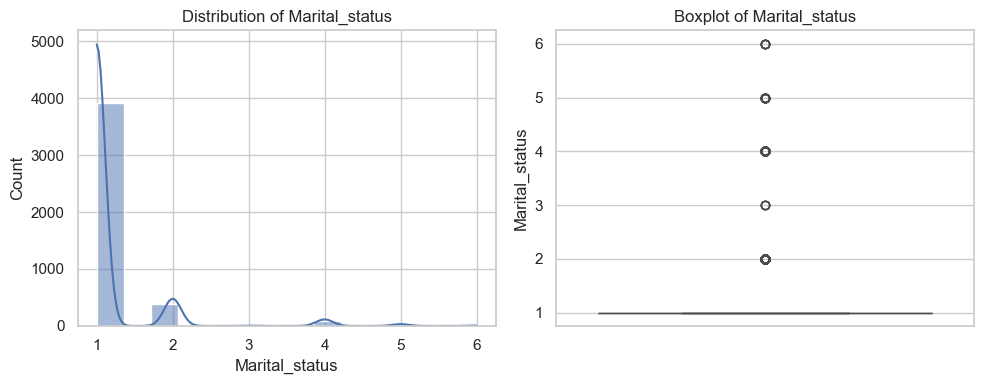

Stats for Marital_status:
count    4424.000000
mean        1.178571
std         0.605747
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: Marital_status, dtype: float64
Skewness: 4.40


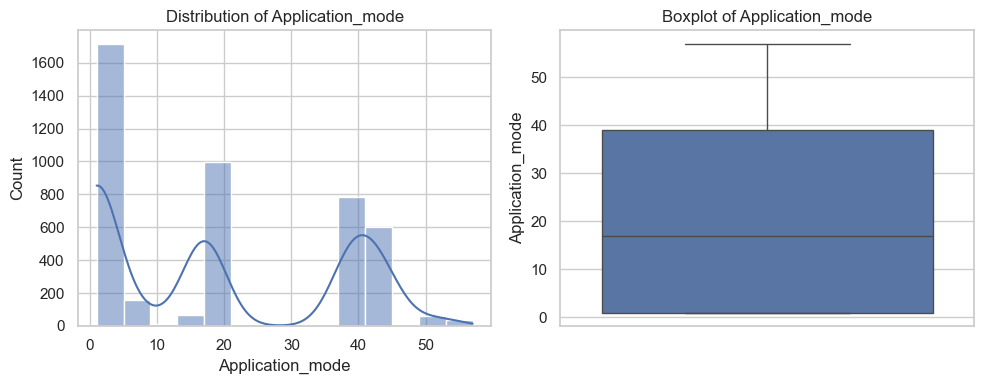

Stats for Application_mode:
count    4424.000000
mean       18.669078
std        17.484682
min         1.000000
25%         1.000000
50%        17.000000
75%        39.000000
max        57.000000
Name: Application_mode, dtype: float64
Skewness: 0.39


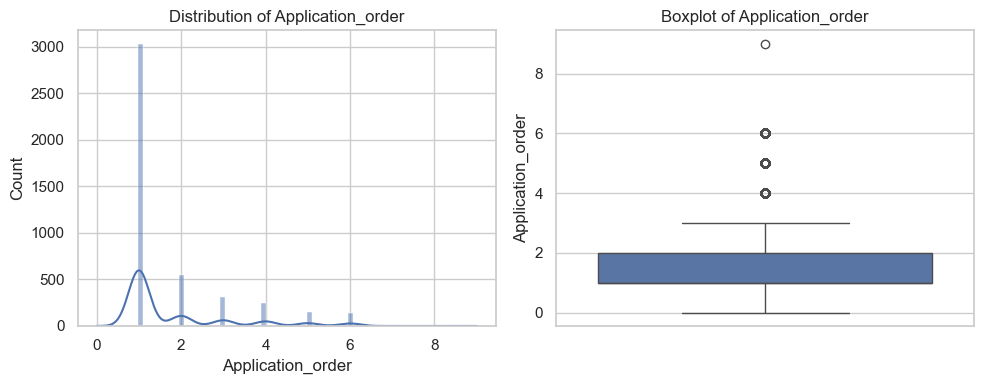

Stats for Application_order:
count    4424.000000
mean        1.727848
std         1.313793
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Application_order, dtype: float64
Skewness: 1.88


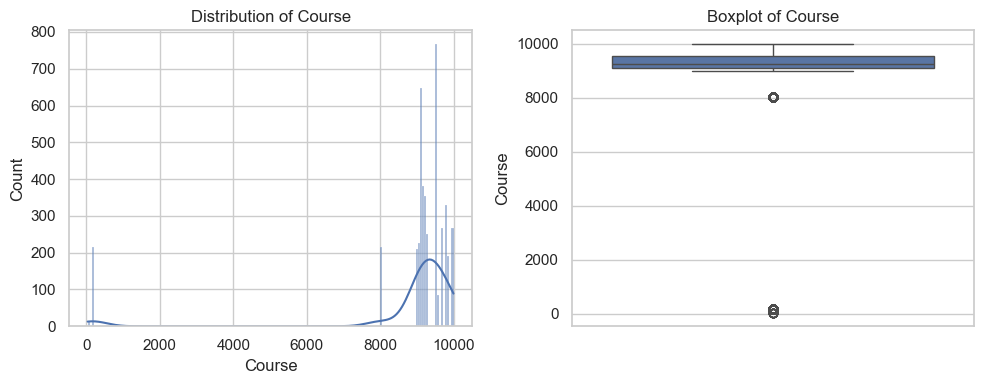

Stats for Course:
count    4424.000000
mean     8856.642631
std      2063.566416
min        33.000000
25%      9085.000000
50%      9238.000000
75%      9556.000000
max      9991.000000
Name: Course, dtype: float64
Skewness: -3.81


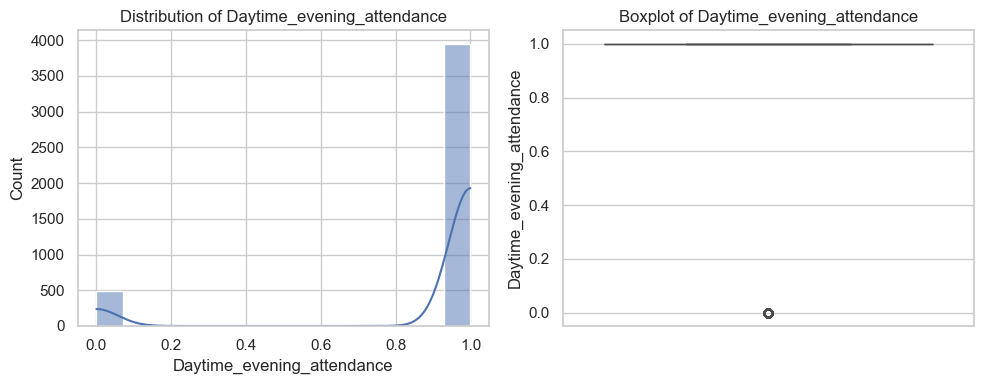

Stats for Daytime_evening_attendance:
count    4424.000000
mean        0.890823
std         0.311897
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Daytime_evening_attendance, dtype: float64
Skewness: -2.51


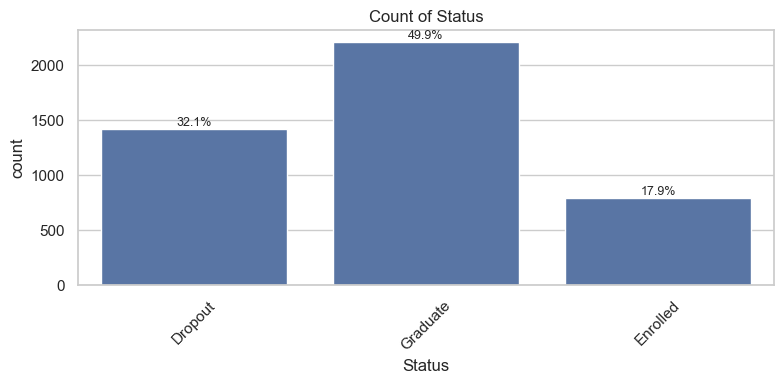

BIVARIATE ANALYSIS


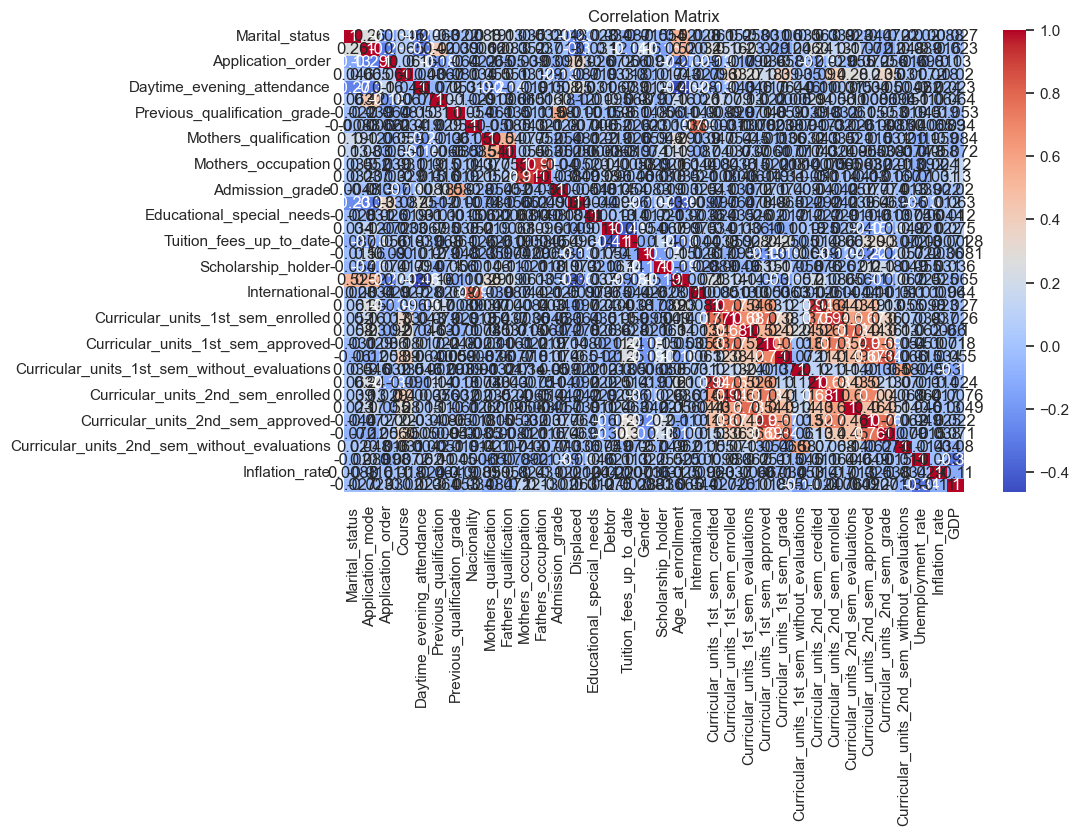

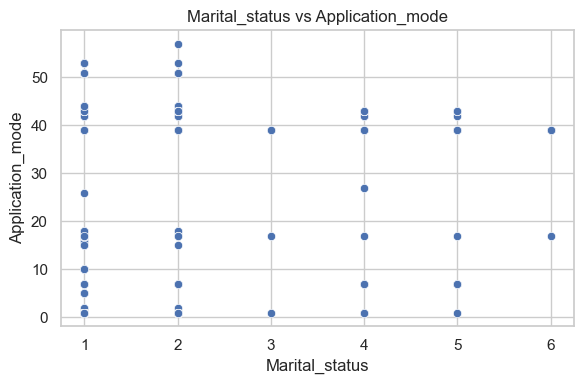

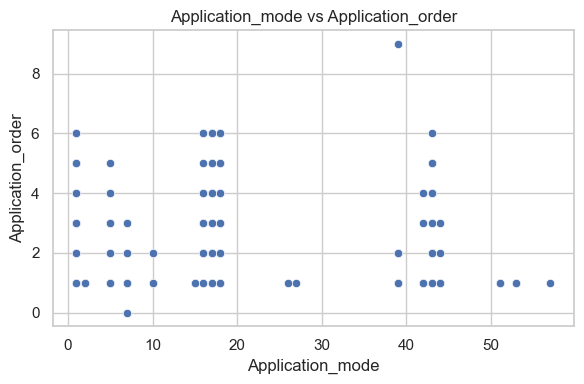

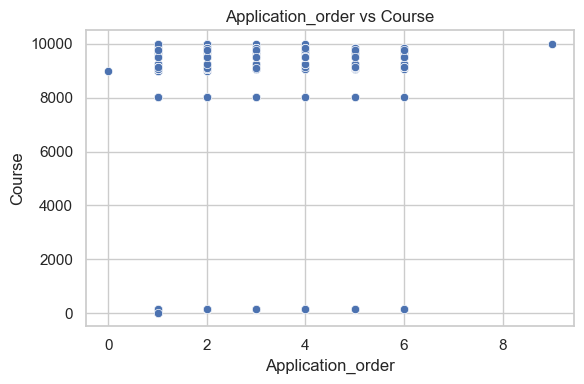

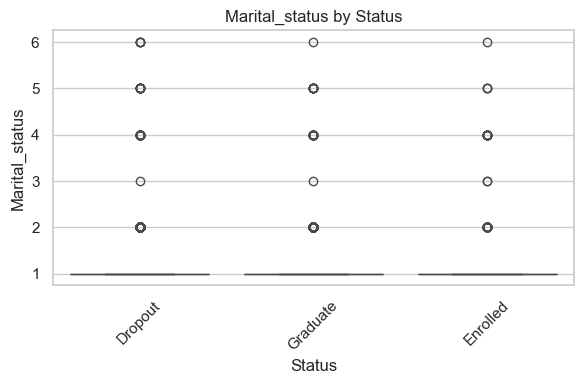

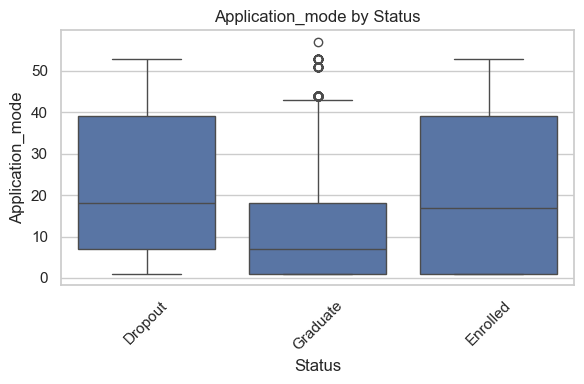

MULTIVARIATE ANALYSIS


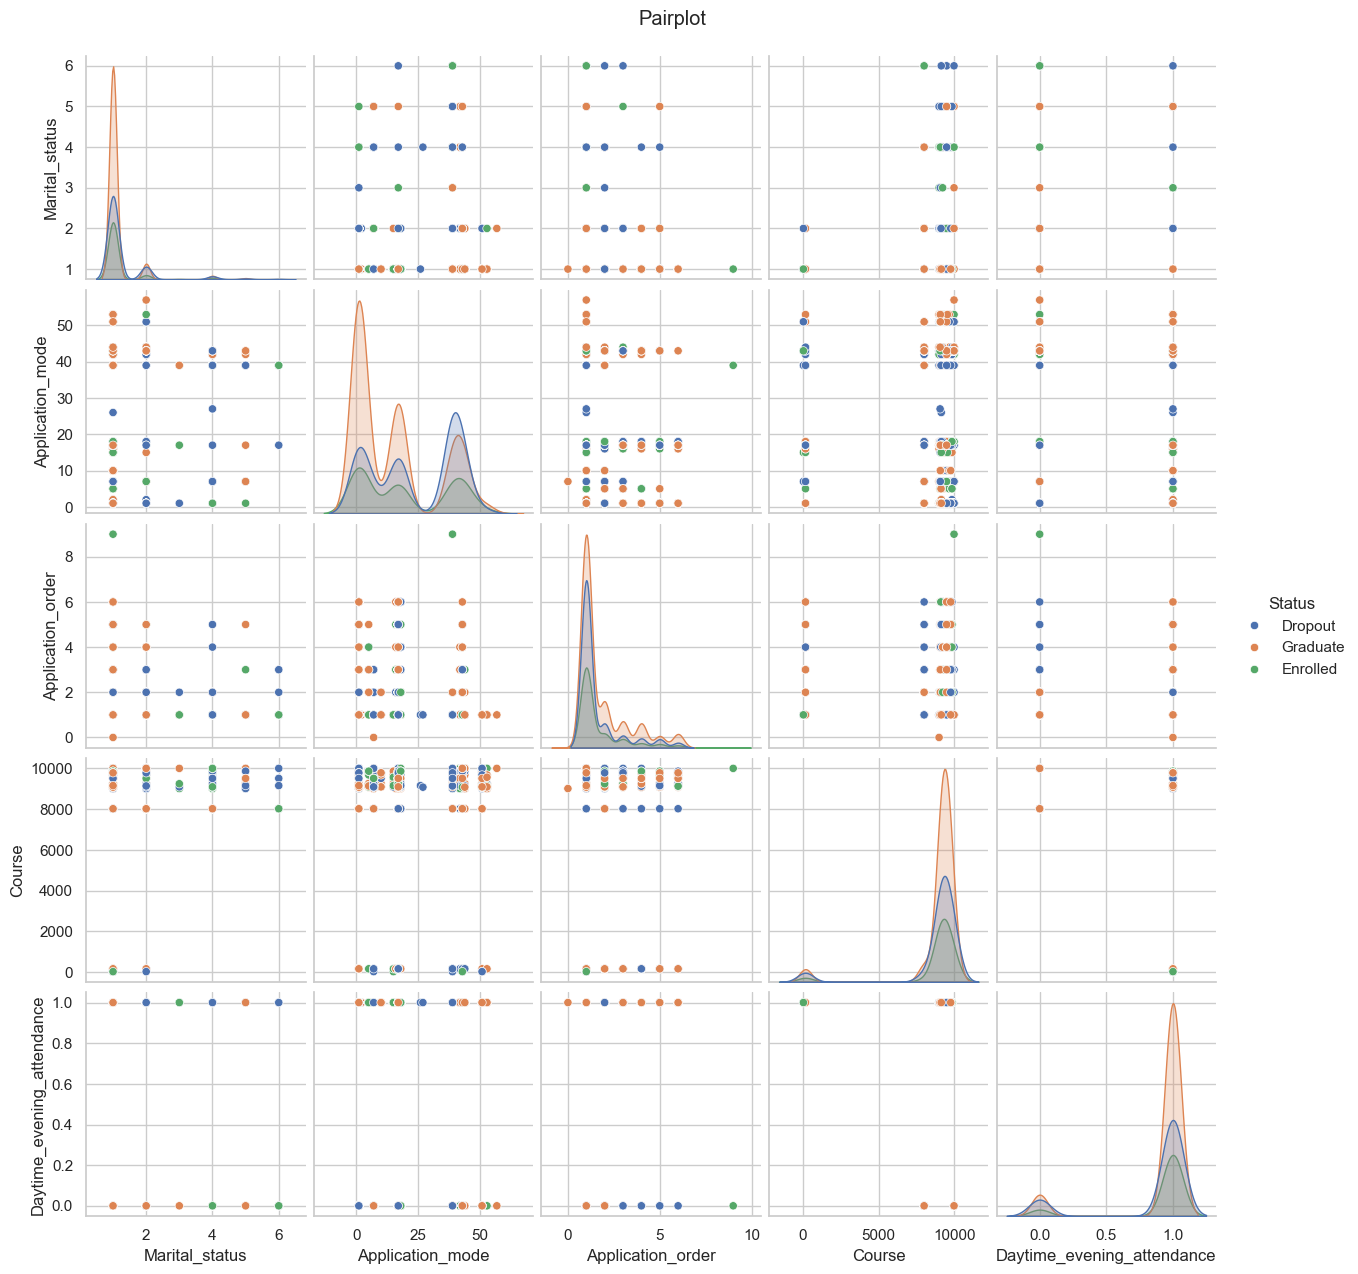

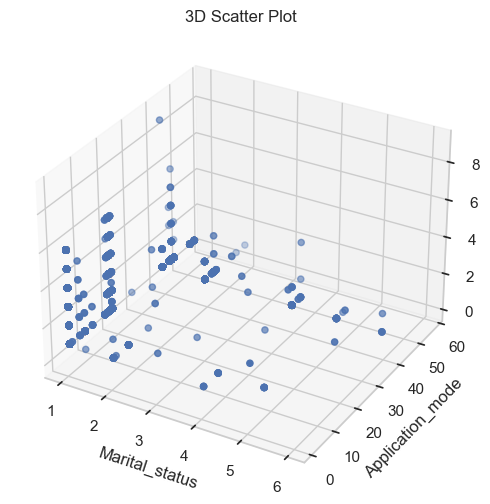

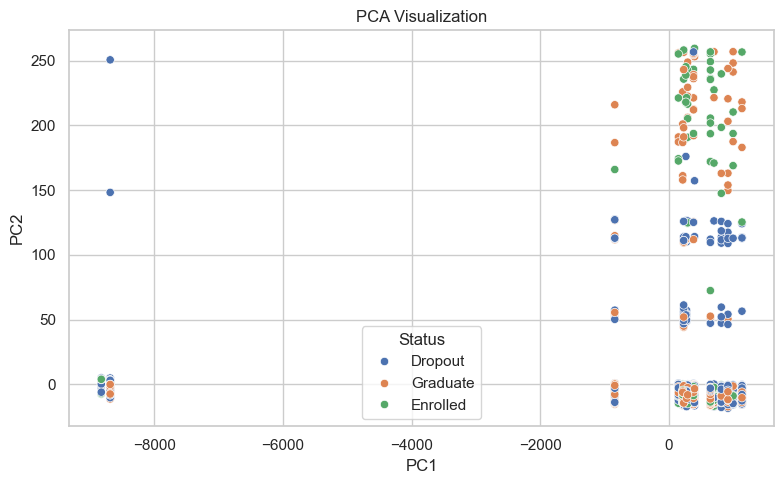

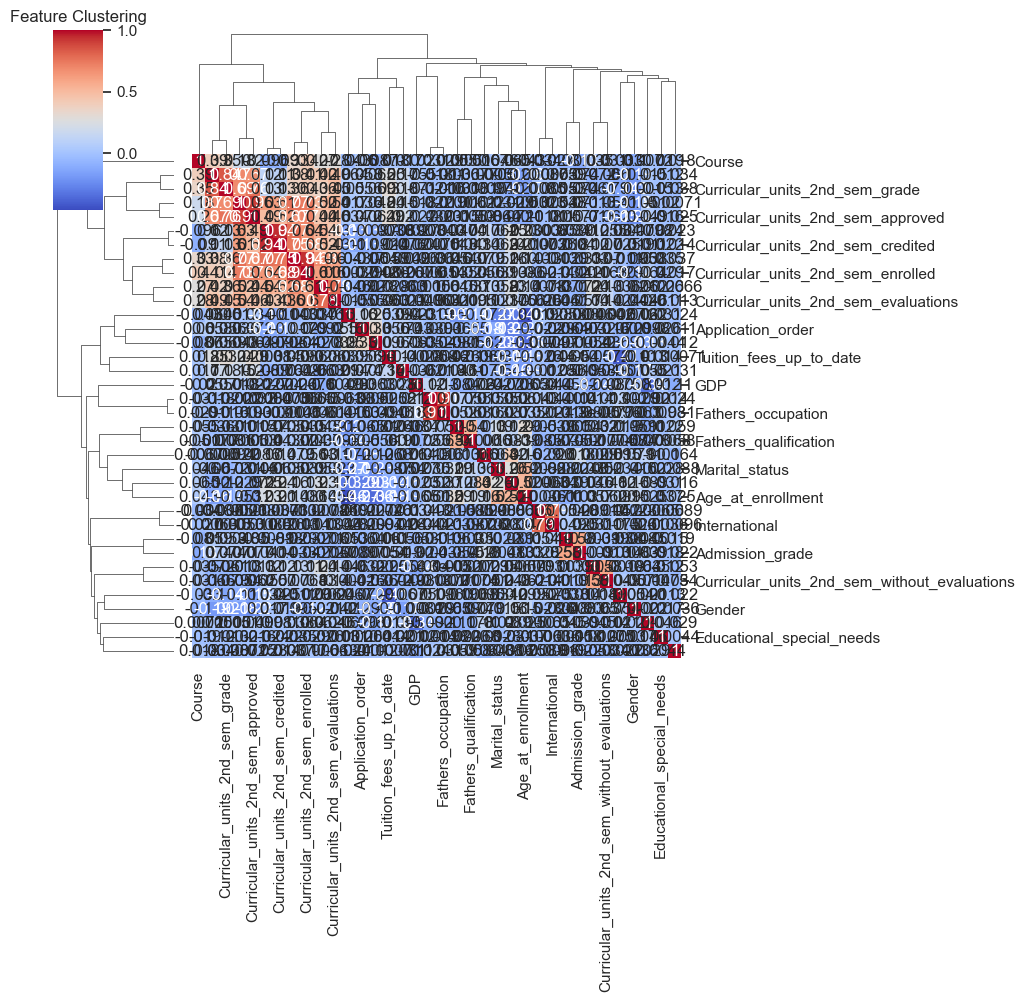

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

sns.set(style="whitegrid")

# --- Setup ---
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# ==============================
# 1. UNIVARIATE ANALYSIS
# ==============================

print("UNIVARIATE ANALYSIS\n" + "="*60)

# Numerical Features (limit to 5 for speed)
for col in numerical_features[:5]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

    print(f"Stats for {col}:\n{df[col].describe()}")
    print(f"Skewness: {df[col].skew():.2f}\n{'='*60}")

# Categorical Features (limit to 5)
for col in categorical_features[:5]:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=df)
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{100*height/total:.1f}%', 
                    (p.get_x() + p.get_width()/2, height), 
                    ha='center', va='bottom', fontsize=9)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ==============================
# 2. BIVARIATE ANALYSIS
# ==============================

print("BIVARIATE ANALYSIS\n" + "="*60)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Numerical vs Numerical (first 3 pairs only)
for a, b in zip(numerical_features, numerical_features[1:4]):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[a], y=df[b])
    plt.title(f'{a} vs {b}')
    plt.tight_layout()
    plt.show()

# Categorical vs Numerical (limit)
for cat in categorical_features[:2]:
    for num in numerical_features[:2]:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f'{num} by {cat}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Categorical vs Categorical (only first 2)
if len(categorical_features) >= 2:
    ct = pd.crosstab(df[categorical_features[0]], df[categorical_features[1]])
    sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{categorical_features[0]} vs {categorical_features[1]}')
    plt.tight_layout()
    plt.show()

# ==============================
# 3. MULTIVARIATE ANALYSIS
# ==============================

print("MULTIVARIATE ANALYSIS\n" + "="*60)

# Pairplot (limit to 5 numerical features)
sns.pairplot(df[numerical_features[:5] + categorical_features[:1]], 
             hue=categorical_features[0] if categorical_features else None,
             diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.show()

# 3D Scatter (first 3 numerical features)
if len(numerical_features) >= 3:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[numerical_features[0]], df[numerical_features[1]], df[numerical_features[2]])
    ax.set_xlabel(numerical_features[0])
    ax.set_ylabel(numerical_features[1])
    ax.set_zlabel(numerical_features[2])
    plt.title('3D Scatter Plot')
    plt.show()

# PCA Visualization
if len(numerical_features) > 2:
    pca = PCA(n_components=2)
    pc = pca.fit_transform(df[numerical_features].fillna(df[numerical_features].mean()))
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=df[categorical_features[0]] if categorical_features else None)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Visualization")
    plt.tight_layout()
    plt.show()

# Clustermap
sns.clustermap(df[numerical_features].corr(), cmap='coolwarm', annot=True)
plt.title("Feature Clustering")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def preprocess_student_data(df, target_column='Status', binning=False):
    df = df.copy()  # agar tidak merusak data asli

    # 1. Menangani missing values
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['float64', 'int64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)

    # 2. Menghapus duplikat
    df.drop_duplicates(inplace=True)

    # 3. Normalisasi fitur numerik (kecuali kolom target)
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_cols = num_cols.drop(target_column) if target_column in num_cols else num_cols
    scaler = MinMaxScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    # 4. Encoding label target
    if df[target_column].dtype == 'object':
        le = LabelEncoder()
        df[target_column] = le.fit_transform(df[target_column])

    # 5. Optional: Binning untuk previous qualification grade
    if binning and 'Previous_qualification_grade' in df.columns:
        df['Grade_Level'] = pd.cut(df['Previous_qualification_grade'],
                                   bins=[0, 100, 150, 200],
                                   labels=[0, 1,2])

    return df


In [5]:
# Panggil fungsi preprocessing
clean_df = preprocess_student_data(df, target_column='Status', binning=True)

# Lihat hasil
clean_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Grade_Level
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.0,0.418605,0.255814,...,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0,0
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.0,0.000000,0.046512,...,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,2,0
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.0,0.837209,0.837209,...,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0,0
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.0,0.860465,0.837209,...,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,2,0
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.0,0.837209,0.860465,...,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,2,0


In [6]:
# Pisahkan fitur dan target
X = clean_df.drop(columns=['Status'])
y = clean_df['Status']
# Encode fitur kategorikal
X_encoded = pd.get_dummies(X)

print(f"Shape setelah encode: {X_encoded.shape}")
X_encoded.head()
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran dataset hasil split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Shape setelah encode: (4424, 39)
Training set shape: X_train=(3539, 37), y_train=(3539,)
Test set shape: X_test=(885, 37), y_test=(885,)


In [7]:
clean_df['Status'].unique()

array([0, 2, 1])

# Modelling

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Impute missing values for KNN (and optionally for all models)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train_imputed, y_train)
dt = DecisionTreeClassifier().fit(X_train_imputed, y_train)
rf = RandomForestClassifier().fit(X_train_imputed, y_train)
svm = SVC().fit(X_train_imputed, y_train)
nb = GaussianNB().fit(X_train_imputed, y_train)

print("Model training selesai.")

Model training selesai.


# Evaluation

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results
 
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}
 
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
 
# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)
 
# Tampilkan DataFrame
print(summary_df)

c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Gaus

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.687006   0.675731  0.687006  0.675740
1            Decision Tree (DT)  0.667797   0.677387  0.667797  0.671167
2            Random Forest (RF)  0.772881   0.758729  0.772881  0.754487
3  Support Vector Machine (SVM)  0.750282   0.748354  0.750282  0.731771
4              Naive Bayes (NB)  0.692655   0.680850  0.692655  0.679823


In [10]:
%pip install requests --quiet

import os
import sys

# Remove shadowing mlflow.py or mlflow.pyc if exists in current directory
need_restart = False
if os.path.exists("mlflow.py"):
    os.rename("mlflow.py", "mlflow_shadow.py")
    need_restart = True
if os.path.exists("mlflow.pyc"):
    os.remove("mlflow.pyc")
    need_restart = True

if need_restart:
    print("A file named 'mlflow.py' or 'mlflow.pyc' was found and renamed/removed.")
    print("Please RESTART the kernel and rerun this cell to avoid import errors.")
    # Stop further execution
    sys.exit()

import mlflow
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mlflow.set_experiment("Compare_Models")  # Optional, set nama eksperimen

with mlflow.start_run():
    for model_name, model in zip(
        ['KNN', 'DT', 'RF', 'SVM', 'NB'],
        [knn, dt, rf, svm, nb]
    ):
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        mlflow.log_metric(f"{model_name}_accuracy", acc)
        mlflow.log_metric(f"{model_name}_precision", prec)
        mlflow.log_metric(f"{model_name}_recall", rec)
        mlflow.log_metric(f"{model_name}_f1", f1)


Note: you may need to restart the kernel to use updated packages.


c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Gaus

# Hyperparameter Tuning

In [11]:
import mlflow
import mlflow.sklearn

mlflow.sklearn.autolog()

with mlflow.start_run():
    final_rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=1,
        random_state=42
    )
    final_rf.fit(X_train, y_train)
    y_pred = final_rf.predict(X_test)
    print("Akurasi:", accuracy_score(y_test, y_pred))

2025/05/22 14:11:56 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/05/22 14:11:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\hrahm\OneDrive\D

Akurasi: 0.7661016949152543


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best parameters:", grid.best_params_)


2025/05/22 14:12:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '376c43bd9292473b9a4ec61da024d9f7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/22 14:12:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Inte

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Gunakan parameter terbaik dari GridSearchCV
final_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Latih dan evaluasi model
final_rf.fit(X_train, y_train)
y_pred = final_rf.predict(X_test)

from sklearn.metrics import classification_report

print("🔍 Classification Report (Random Forest - Tuned):")
print(classification_report(y_test, y_pred))


2025/05/22 14:12:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '526c78bad6df422fbf954c577c1375be', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/05/22 14:12:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Inte

🔍 Classification Report (Random Forest - Tuned):
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       316
           1       0.51      0.29      0.37       151
           2       0.78      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.77      0.75       885



In [14]:
import pandas as pd
import numpy as np

# Contoh input data dalam bentuk DataFrame
input_data_raw = pd.DataFrame({
    'Curricular_units_2nd_sem_grade': [3.0],
    'Curricular_units_2nd_sem_approved': [1],
    'Curricular_units_1st_sem_grade': [3.0],
    'Tuition_fees_up_to_date': [0],
    'Curricular_units_1st_sem_approved': [0],
    'Age_at_enrollment': [25]
})

# Pastikan urutan dan jumlah kolom sama dengan X_train
input_data_aligned = input_data_raw.reindex(columns=X_train.columns, fill_value=0)

# Impute missing values (gunakan imputer yang sama seperti training)
input_data_imputed = imputer.transform(input_data_aligned)

# Lakukan prediksi
prediction = final_rf.predict(input_data_imputed)

# Mapping hasil prediksi ke label asli
status_mapping = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}  # Sesuaikan dengan encoding
predicted_label = status_mapping[prediction[0]]

# Tampilkan hasil prediksi
print(f"Hasil Prediksi: {predicted_label}")

Hasil Prediksi: Dropout


c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
import joblib

joblib.dump(final_rf, 'best_random_forest_model.pkl')
# joblib.load('best_random_forest_model.pkl') untuk load ulang


['best_random_forest_model.pkl']

In [16]:
from prometheus_client import start_http_server, Gauge
import time
from sklearn.metrics import accuracy_score

# Pastikan model sudah dilatih sebelum menjalankan cell ini!
if 'y_test' in globals() and 'final_rf' in globals() and 'X_test' in globals():
    # Hindari duplikasi metric di Jupyter
    if 'rf_accuracy' not in globals():
        rf_accuracy = Gauge('rf_model_accuracy', 'Akurasi Model Random Forest')
    # Set nilai metrik akurasi
    rf_accuracy.set(accuracy_score(y_test, final_rf.predict(X_test)))
    # Mulai HTTP server Prometheus di port 8000 (sekali saja)
    try:
        start_http_server(8000)
        print("Prometheus metrics server running on http://localhost:8000/")
    except OSError:
        print("Prometheus metrics server already running on http://localhost:8000/")
    # Loop agar server tetap hidup (stop cell untuk menghentikan)
    while True:
        time.sleep(10)
else:
    print("y_test, X_test, atau final_rf belum didefinisikan. Jalankan cell training & evaluasi model terlebih dahulu.")

2025/05/22 14:12:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\hrahm\OneDrive\Documents\streamlit\MSML\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Prometheus metrics server running on http://localhost:8000/


KeyboardInterrupt: 